# Aula 01 - Árvores - EXERCÍCIO

Utilizando o dataset titanic_train.csv, desenvolva uma árvore de decisão com o objetivo de prever a chance de uma pessoa sobreviver ao naufrágio. Procure fazer com que o seu o modelo não apresente **overfitting** e maximize a acurácia no dataset titanic_test.csv.

Ao final do notebook, reporte:

1 - Uma figura com a árvore treinada  
2 - A acurácia, precisão e recall do seu modelo na base utilizada para treino e validação    
3 - A acurácia, precisão e recall do seu modelo na base titanic_test.csv  
4 - Os parâmetros da árvore  
5 - Qual é a variável mais importante no processo de decisão?  
6 - Imagine que, no seu ambiente de trabalho, bibliotecas não estejam disponíveis. Utilize o resultado do seu modelo **já treinado** para criar um código, utilizando somente os recursos nativos do Python, que seja capaz de prever a sobrevivência de um passageiro.  

In [1]:
import pandas as pd

In [46]:
df_titanic_train = pd.read_csv('titanic_train.csv')
df_titanic_test = pd.read_csv('titanic_test.csv')

In [47]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,503,0,3,1,29.31947,0,0,7.6292,0,2
1,705,0,3,0,26.00000,1,0,7.8542,0,0
2,464,0,2,0,48.00000,0,0,13.0000,0,0
3,203,0,3,0,34.00000,0,0,6.4958,0,0
4,816,0,1,0,29.31947,0,0,0.0000,1,0


In [48]:
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  534 non-null    int64  
 1   Survived     534 non-null    int64  
 2   Pclass       534 non-null    int64  
 3   Sex          534 non-null    int64  
 4   Age          534 non-null    float64
 5   SibSp        534 non-null    int64  
 6   Parch        534 non-null    int64  
 7   Fare         534 non-null    float64
 8   Cabin        534 non-null    int64  
 9   Embarked     534 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 41.8 KB


In [50]:
X = df_titanic_train.drop(['PassengerId', 'Survived'], axis=1)
y = df_titanic_train['Survived']

print(X.shape, y.shape)

(534, 8) (534,)


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(373, 8) (373,)
(161, 8) (161,)


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
modelo = DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)

modelo

DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)

In [145]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)

In [146]:
y_train_pred = modelo.predict(X_train)

y_valid_pred = modelo.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(373,) (161,)


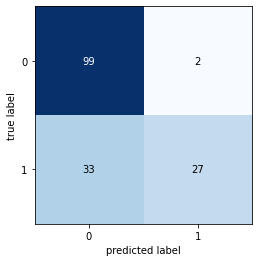

In [147]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.78, Precision: 0.97, Recall: 0.43
Validação:
Acc: 0.78, Precision: 0.93, Recall: 0.45


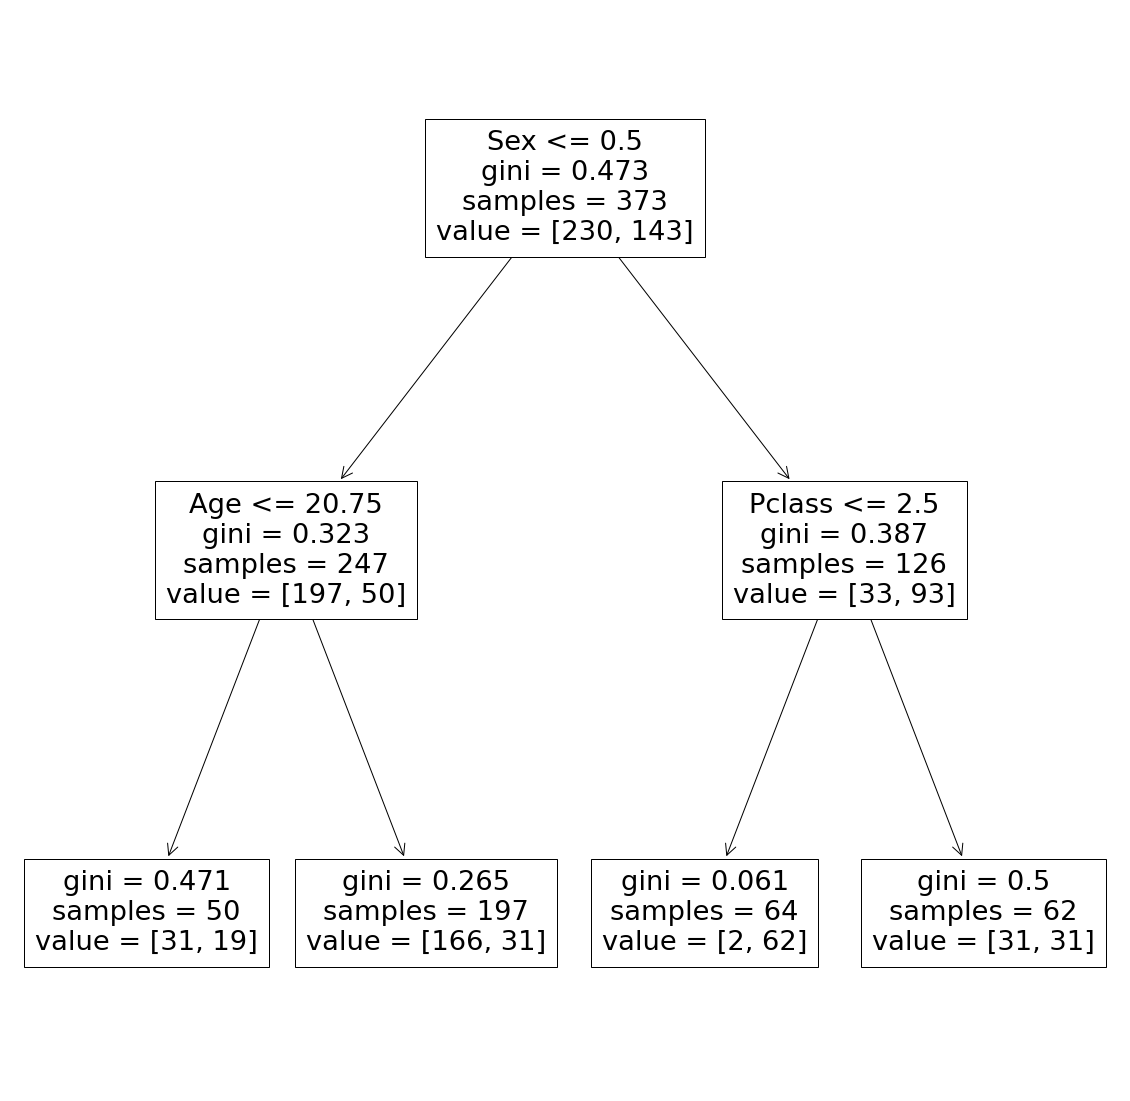

In [149]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(modelo, feature_names=X_train.columns)
plt.show()

# Resultados

1 - Uma figura com a árvore treinada  


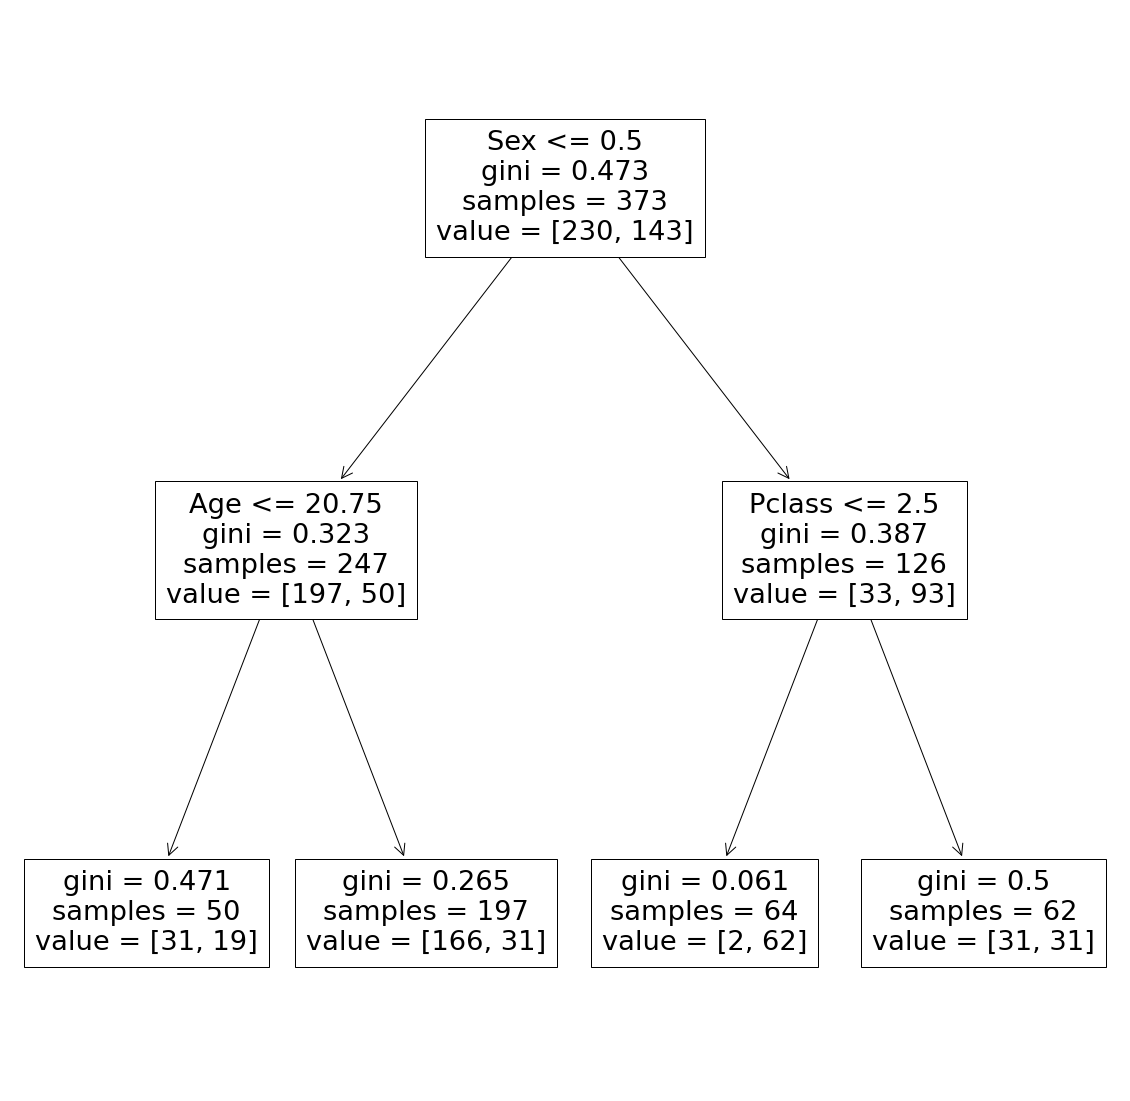

In [150]:
plt.figure(figsize=(20, 20))
plot_tree(modelo, feature_names=X_train.columns)
plt.show()

2 - A acurácia, precisão e recall do seu modelo na base utilizada para treino e validação   

In [151]:
print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.78, Precision: 0.97, Recall: 0.43
Validação:
Acc: 0.78, Precision: 0.93, Recall: 0.45


3 - A acurácia, precisão e recall do seu modelo na base titanic_test.csv 

In [162]:
df_titanic_test['Predict'] = modelo.predict(df_titanic_test[X_train.columns])

df_titanic_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Predict
0,1,0,3,0,22.0,1,0,7.2500,0,0,0
1,3,1,3,1,26.0,0,0,7.9250,0,0,0
2,4,1,1,1,35.0,1,0,53.1000,1,0,1
3,5,0,3,0,35.0,0,0,8.0500,0,0,0
4,7,0,1,0,54.0,0,0,51.8625,1,0,0


In [153]:
acc_test = accuracy_score(df_titanic_test['Survived'], df_titanic_test['Predict'])
prec_test = precision_score(df_titanic_test['Survived'], df_titanic_test['Predict'])
rec_test = recall_score(df_titanic_test['Survived'], df_titanic_test['Predict'])

print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Teste:
Acc: 0.80, Precision: 0.93, Recall: 0.51


4 - Os parâmetros da árvore  

In [154]:
modelo.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

5 - Qual é a variável mais importante no processo de decisão?  

R: A variável mais importante é o sexo, pois foi a primeira escolha de quebra.  

6 - Imagine que, no seu ambiente de trabalho, bibliotecas não estejam disponíveis. Utilize o resultado do seu modelo **já treinado** para criar um código, utilizando somente os recursos nativos do Python, que seja capaz de prever a sobrevivência de um passageiro.  

In [164]:
def passageiro_sobrevive(passageiro):
    
    if passageiro['Sex'] <= 0.5:
        return 0
    else:
        if passageiro['Pclass'] <= 2.5:
            return 1
        else:
            return 0

In [172]:
passageiro = {
    'Pclass': 2,
    'Sex': 1,
    'Age': 90.0,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Cabin': 0,
    'Embarked': 0
}

passageiro_sobrevive(passageiro)

1